### Notebook destinado a exploração dos datasets de saude disponiveis no site do IBGE

- [Datasets de Saúde](https://cidades.ibge.gov.br/brasil/ba/vitoria-da-conquista/pesquisa/32/28163)
- [Municipios georeferenciados](https://github.com/kelvins/municipios-brasileiros/blob/main/csv/municipios.csv)
- [Geojson dos municipios da Bahia](https://github.com/tbrugz/geodata-br/blob/master/geojson/geojs-29-mun.json?short_path=1b77524)

### Objetivo
- Explorar os datasets de saude disponiveis no site do IBGE e enriquecer com informações geograficas dos municipios para exibir informações de saúde em um mapa

### Dados
- Dados de saúde do IBGE - xlsx localizado em `data/serie_historica.xlsx`
- Dados geograficos dos municipios - csv localizado em `data/municipios.csv`
- Geojson dos municipios da Bahia - json localizado em `data/geojs-29-mun.json`


In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../..')))

from src.scripts import excel_processor, health_analyzer, sheet_utils
from folium.plugins import HeatMap
import pandas as pd
import csv
import re
import folium
import json

In [ ]:
# Inicializa o analisador
analyzer = health_analyzer.HealthDataAnalyzer('../../assets/data/serie_historica.xlsx')

# Carregando uma aba específica
df = analyzer.load_sheet('indicador 3')

# Relatório de qualidade dos dados
quality_report = analyzer.get_data_quality_report(df)
print("\nRelatório de Qualidade dos Dados:")
print(quality_report)

# Análise temporal
time_analysis = analyzer.analyze_time_series(df)
print("\nAnálise Temporal:")
print(time_analysis['estatisticas_anuais'])

# Identificação de outliers
outliers = analyzer.identify_outliers(df, '2020')
print("\nOutliers identificados para 2020:")
print(outliers)

# Análise de tendência para um município específico
trend = analyzer.trend_analysis(df, "Salvador")
print("\nAnálise de Tendência - Salvador:")
print(trend)


Relatório de Qualidade dos Dados:
                       tipo  nulos  nulos_pct  únicos                exemplo
Meta Estadual: 90%   object      0       0.00      50  Macrorregião de Saúde
Unnamed: 1           object     40       8.73      29        Região de Saúde
Unnamed: 2           object     40       8.73     418              Cod. IBGE
Unnamed: 3           object     40       8.73     418              Município
Unnamed: 4          float64      2       0.44     400                 2010.0
Unnamed: 5          float64      2       0.44     385                 2011.0
Unnamed: 6          float64      2       0.44     389                 2012.0
Unnamed: 7          float64      2       0.44     402                 2013.0
Unnamed: 8          float64      2       0.44     393                 2014.0
Unnamed: 9          float64      2       0.44     390                 2015.0
Unnamed: 10         float64      2       0.44     403                 2016.0
Unnamed: 11         float64      2       

ValueError: Nenhuma coluna de ano encontrada no DataFrame para o intervalo especificado.

In [15]:

# Inicializa o analisador
analyzer = sheet_utils.ExcelStructureAnalyzer('../../assets/data/serie_historica.xlsx')

# Analisa todas as abas
structures = analyzer.analyze_all_sheets()

# Gera e exibe o relatório
print(analyzer.generate_report())
sheet_structure = structures['indicador 3']
print("\nEstrutura detalhada da aba 'Indicador 3':")
print(f"Número de colunas: {sheet_structure.column_count}")
print(f"Colunas de anos identificadas: {sheet_structure.year_columns}")
print(f"Tipos de dados por coluna: {sheet_structure.column_types}")

Analisando aba: Indicador 1 número
Analisando aba: Indicador 1 taxa
Analisando aba: indicador 3
Analisando aba: Indicador 4
Analisando aba: indicador 5
Analisando aba: indicador 6
Analisando aba: indicador 8
Analisando aba: indicador 9
Analisando aba: inidicador 3 - causa
Analisando aba: Indicador 11 razao excitopa
Analisando aba: inidicador 11 numero
Analisando aba: Inidicador 11 - mulheres 25a64
Analisando aba: Indicador 10
Analisando aba: Indicador 11
Analisando aba: Indicador 12
Analisando aba: Indicador 13
Analisando aba: Indicador 14
Analisando aba: Indicador 15
Analisando aba: Indicador 16
Analisando aba: Indicador 17 
Analisando aba: Indicador 18
Analisando aba: Indicador 19
Analisando aba: indicador 23
=== Relatório de Análise Estrutural das Planilhas ===

Total de abas analisadas: 23


=== Variações de Cabeçalho ===

23 abas com 1 linhas de cabeçalho:
  Abas: Indicador 1 número, Indicador 1 taxa, indicador 3, Indicador 4, indicador 5, indicador 6, indicador 8, indicador 9, in

In [ ]:
xlsx_file = '../../assets/data/serie_historica.xlsx'
# pegar titulo e subtitulo de cada aba  e saçvar em um csv com as colunas, titulo, subtitulo e nome_arquivo sendo titulo e subtitulo a primeira e segunda linha de cada aba
sheet_names = pd.read_excel(xlsx_file, sheet_name=None, header=None)  # Lê todas as abas a partir da terceira linha

df_titulo = pd.DataFrame(columns=['nome_arquivo', 'titulo', 'subtitulo', 'fonte'])

pattern = re.compile(r'Fonte:[^,]*')


for sheet_name, df in sheet_names.items():
    safe_sheet_name = sheet_name.replace(" ", "_").replace("/", "_")

    # Encontrar a informação de fonte
    source_info = None
    for i in range(1, 3):
        if isinstance(df.iloc[-i, 0], str):
            match = pattern.search(df.iloc[-i, 0])
            if match:
                source_info = match.group(0)
                break

    new_row = pd.DataFrame([{
        'nome_arquivo': safe_sheet_name,
        'titulo': df.iloc[0, 0],
        'subtitulo': df.iloc[1, 0],
        'fonte': source_info
    }])
    df_titulo = pd.concat([df_titulo, new_row], ignore_index=True)

df_titulo.to_csv('../../assets/data/titulo_subtitulo.csv', index=False, encoding='utf-8', quotechar='"', quoting=csv.QUOTE_ALL)    
df_titulo

,nome_arquivo,titulo,subtitulo,fonte
0,Indicador_1_número,Indicador 1. Óbitos Prematuros (30 a 69 anos) ...,Meta Estadual: Redução 2% ao ano,None
1,Indicador_1_taxa,Indicador 1. Óbitos Prematuros (30 a 69 anos) ...,Meta Estadual: Redução 2% ao ano,Fonte: IBGE- Estimativa populacional (TCU)
2,indicador_3,Indicador 3. Proporção de óbitos com causa def...,Meta Estadual: 90%,Fonte: SIM
3,Indicador_4,Indicador 4. Proporção de vacinas selecionad...,Meta Estadual: 75% correspondendo a cobertura ...,None
4,indicador_5,Indicador 05. Proporção de casos de doenças de...,Meta Estadual: 75%,None
5,indicador_6,Indicador 06. Proporção de Cura de casos novos...,Meta Estadual: ≥ 88%,None
6,indicador_8,Indicador 8. Nº de Casos novos de sífilis cong...,Meta Estadual: Reduzir em 20%,None
7,indicador_9,Indicador 9. Casos novos de aids em menores de...,Meta Estadual: Reduzir em 20%,None
8,inidicador_3_-_causa,Indicador 3. Registro de óbitos com causa bási...,Cod IBGE,Fonte: Sesab/Suvisa/DIS - SIM
9,Indicador_11_razao_excitopa,Indicador 11. Razão de exames citopatológicos ...,NaN,Fonte: Sesab/Suvisa/DIS - SIA/SUS


In [26]:
df_indicador_1 = pd.read_csv('../../assets/indicadores/indicador_3.csv')
df_indicador_1

,Macrorregião de Saúde,Região de Saúde,Cod. IBGE,Município,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Centro Leste,Feira de Santana,290110,Amélia Rodrigues,95.731707,95.266272,98.013245,88.194444,90.789474,87.134503,83.620690,93.788820,86.813187,81.595092,84.293194
1,Centro Leste,Feira de Santana,290150,Anguera,90.909091,96.610169,80.701754,92.537313,89.855072,89.830508,78.947368,82.352941,85.333333,77.027027,59.154930
2,Centro Leste,Feira de Santana,290170,Antônio Cardoso,81.818182,77.464789,78.571429,79.710145,82.758621,84.507042,71.875000,83.606557,72.972973,69.565217,77.586207
3,Centro Leste,Feira de Santana,290260,Baixa Grande,78.095238,59.595960,71.666667,75.833333,63.414634,78.787879,77.697842,63.975155,81.818182,89.873418,87.741935
4,Centro Leste,Feira de Santana,290640,Candeal,73.437500,62.000000,64.444444,66.129032,66.000000,51.851852,58.139535,62.857143,64.285714,72.881356,71.186441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Sul,Valença,292467,Piraí do Norte,96.774194,92.682927,97.222222,100.000000,88.000000,85.365854,71.428571,85.365854,91.666667,62.500000,60.416667
413,Sul,Valença,293120,Taperoá,75.362319,82.089552,83.333333,79.000000,88.541667,83.333333,87.671233,87.500000,88.888889,87.878788,71.739130
414,Sul,Valença,293160,Teolândia,85.454545,81.818182,86.363636,88.888889,92.957746,93.846154,100.000000,95.000000,96.103896,97.402597,92.307692
415,Sul,Valença,293290,Valença,85.992908,84.570312,82.688766,80.373832,84.280936,82.385321,80.872483,84.324324,77.199282,75.245902,71.869919


In [27]:

# Carregar os dados de coordenadas das cidades
df_coords = pd.read_csv('../../municipios.csv')
df_coords

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo
...,...,...,...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29,3971,74,America/Sao_Paulo
5566,2517407,Zabelê,-8.07901,-37.1057,0,25,542,83,America/Sao_Paulo
5567,3557154,Zacarias,-21.05060,-50.0552,0,35,2973,18,America/Sao_Paulo
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21,1287,98,America/Sao_Paulo


In [ ]:
# Incluir georeferenciamento ao dataset
df_indicador_3 = pd.read_csv('../../assets/indicadores/indicador_3.csv')
required_columns_coords = ['codigo_ibge', 'latitude', 'longitude']
if not all(col in df_coords.columns for col in required_columns_coords):
    raise ValueError(f"Colunas necessárias ausentes em df_coords: {required_columns_coords}")

# Ajustar o código IBGE da tabela de coordenadas para remover o último dígito
df_coords['codigo_ibge'] = df_coords['codigo_ibge'].astype(str).str[:-1].astype(int)

# Converter a coluna 'Cod. IBGE' para inteiro
df_indicador_3['Cod. IBGE'] = df_indicador_3['Cod. IBGE'].astype(int)

# Mesclar os dados dos indicadores com as coordenadas das cidades
df_merged = pd.merge(df_indicador_3, df_coords, left_on='Cod. IBGE', right_on='codigo_ibge')
df_merged

,Macrorregião de Saúde,Região de Saúde,Cod. IBGE,Município,2010,2011,2012,2013,2014,2015,...,2020,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,Centro Leste,Feira de Santana,290110,Amélia Rodrigues,95.731707,95.266272,98.013245,88.194444,90.789474,87.134503,...,84.293194,290110,Amélia Rodrigues,-12.3914,-38.7563,0,29,3321,75,America/Sao_Paulo
1,Centro Leste,Feira de Santana,290150,Anguera,90.909091,96.610169,80.701754,92.537313,89.855072,89.830508,...,59.154930,290150,Anguera,-12.1462,-39.2462,0,29,3329,75,America/Sao_Paulo
2,Centro Leste,Feira de Santana,290170,Antônio Cardoso,81.818182,77.464789,78.571429,79.710145,82.758621,84.507042,...,77.586207,290170,Antônio Cardoso,-12.4335,-39.1176,0,29,3333,75,America/Sao_Paulo
3,Centro Leste,Feira de Santana,290260,Baixa Grande,78.095238,59.595960,71.666667,75.833333,63.414634,78.787879,...,87.741935,290260,Baixa Grande,-11.9519,-40.1690,0,29,3351,74,America/Sao_Paulo
4,Centro Leste,Feira de Santana,290640,Candeal,73.437500,62.000000,64.444444,66.129032,66.000000,51.851852,...,71.186441,290640,Candeal,-11.8049,-39.1203,0,29,3427,75,America/Sao_Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Sul,Valença,292467,Piraí do Norte,96.774194,92.682927,97.222222,100.000000,88.000000,85.365854,...,60.416667,292467,Piraí do Norte,-13.7590,-39.3836,0,29,3019,73,America/Sao_Paulo
413,Sul,Valença,293120,Taperoá,75.362319,82.089552,83.333333,79.000000,88.541667,83.333333,...,71.739130,293120,Taperoá,-13.5321,-39.1009,0,29,3923,75,America/Sao_Paulo
414,Sul,Valença,293160,Teolândia,85.454545,81.818182,86.363636,88.888889,92.957746,93.846154,...,92.307692,293160,Teolândia,-13.5896,-39.4840,0,29,3931,73,America/Sao_Paulo
415,Sul,Valença,293290,Valença,85.992908,84.570312,82.688766,80.373832,84.280936,82.385321,...,71.869919,293290,Valença,-13.3669,-39.0730,0,29,3957,75,America/Sao_Paulo


In [29]:
# Função para criar o mapa de calor
def create_heatmap(year):
    # Carregar os dados dos indicadores
    df_indicador_3 = pd.read_csv('../../assets/indicadores/indicador_3.csv')

    # Carregar os dados de coordenadas das cidades
    df_coords = pd.read_csv('../../assets/data/municipios.csv')

    # Verificar se as colunas necessárias estão presentes
    required_columns = ['Cod. IBGE', 'Município', str(year)]
    if not all(col in df_indicador_3.columns for col in required_columns):
        raise ValueError(f"Colunas necessárias ausentes em df_indicador_3: {required_columns}")

    required_columns_coords = ['codigo_ibge', 'latitude', 'longitude']
    if not all(col in df_coords.columns for col in required_columns_coords):
        raise ValueError(f"Colunas necessárias ausentes em df_coords: {required_columns_coords}")

    # Ajustar o código IBGE da tabela de coordenadas para remover o último dígito
    df_coords['codigo_ibge'] = df_coords['codigo_ibge'].astype(str).str[:-1].astype(int)

    # Converter a coluna 'Cod. IBGE' para inteiro
    df_indicador_3['Cod. IBGE'] = df_indicador_3['Cod. IBGE'].astype(int)

    # Mesclar os dados dos indicadores com as coordenadas das cidades
    df_merged = pd.merge(df_indicador_3, df_coords, left_on='Cod. IBGE', right_on='codigo_ibge')

    # Verificar se a mesclagem foi bem-sucedida
    if df_merged.empty:
        raise ValueError("A mesclagem dos dados resultou em um DataFrame vazio. Verifique os dados de entrada.")

    # Criar um mapa centrado na Bahia
    map_bahia = folium.Map(location=[-12.9704, -38.5124], zoom_start=6)

    # Criar uma lista de pontos de calor
    heat_data = [[row['latitude'], row['longitude'], row[str(year)]] for _, row in df_merged.iterrows() if pd.notna(row['latitude']) and pd.notna(row['longitude'])]

    # Adicionar a camada de mapa de calor
    HeatMap(heat_data).add_to(map_bahia)

    # Salvar o mapa em um arquivo HTML
    map_bahia.save(f'../../assets/html/mapa_indicadores_{year}.html')

# Solicitar o ano ao usuário
year = input("Digite o ano para exibir o mapa de calor (2010-2020): ")
create_heatmap(year)
    

In [ ]:
# Caminho para o arquivo GeoJSON local
geojson_path = '../../assets/data/geojs-29-mun.json'

# Carregue o arquivo GeoJSON
with open(geojson_path, 'r', encoding='utf-8') as file:
    geojson_data = json.load(file)

# Crie um mapa centrado em uma coordenada específica (por exemplo, Brasil)
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Adicione o GeoJSON ao mapa (poligonos dos municipios)
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'fillColor': '#CCCCCC',
        'color': '#000000',
        'weight': 1,
        'fillOpacity': 0.4
    }
).add_to(mapa)

# Salve o mapa em um arquivo HTML
mapa.save("../../assets//html/mapa_bahia.html")

In [33]:
import folium
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Caminho para o arquivo GeoJSON local
geojson_path = '../../assets/data/geojs-29-mun.json'

# Carregua o arquivo GeoJSON
with open(geojson_path, 'r', encoding='utf-8') as file:
    geojson_data = json.load(file)

# Carregua os dados do CSV dos municipios
df = pd.read_csv('../../assets/data/municipios.csv')

# Verifique se os dados foram carregados corretamente
print(df.head())

# Função para mapear um valor para uma cor em um gradiente
def color_gradient_picker(valor, min_val=0, max_val=100):
    norm = mcolors.Normalize(vmin=min_val, vmax=max_val)
    cmap = plt.cm.get_cmap('RdYlGn')  # Paleta de cores (pode ser alterada)
    rgba_color = cmap(norm(valor))
    hex_color = mcolors.rgb2hex(rgba_color)
    return hex_color

# Crie um mapa centrado na Bahia
mapa = folium.Map(location=[-12.9704, -38.5124], zoom_start=6)

# Função para pegar valores do indicador de um município
def get_indicador_value(nome_municipio, ano):
    return df.loc[df['nome'].str.strip().str.lower() == nome_municipio.strip().lower(), ano].values[0] \
        if not df.loc[df['nome'].str.strip().str.lower() == nome_municipio.strip().lower(), ano].empty else 0

print(get_indicador_value('Salvador', '2020'))
# # Adicione o GeoJSON ao mapa com a coloração baseada nos valores do CSV
# folium.GeoJson(
#     geojson_data,
#     style_function=lambda feature: {
#         'fillColor': color_gradient_picker(
#             df.loc[df['nome'].str.strip().str.lower() == feature['properties']['name'].strip().lower(), '2020'].values[0]
#             if not df.loc[df['nome'].str.strip().str.lower() == feature['properties']['name'].strip().lower(), '2020'].empty else 0,
#             min_val=df['2020'].min(),
#             max_val=df['2020'].max()
#         ),
#         'color': 'black',
#         'weight': 1,
#         'fillOpacity': 0.7
#     },
#     tooltip=folium.GeoJsonTooltip(fields=['name'], aliases=['Município:'])
# ).add_to(mapa)

# # Salve o mapa em um arquivo HTML
# mapa.save("../../assets/data/html/mapa_bahia_indicadores.html")


   codigo_ibge                 nome  latitude  longitude  capital  codigo_uf  \
0      5200050      Abadia de Goiás -16.75730   -49.4412        0         52   
1      3100104  Abadia dos Dourados -18.48310   -47.3916        0         31   
2      5200100            Abadiânia -16.19700   -48.7057        0         52   
3      3100203               Abaeté -19.15510   -45.4444        0         31   
4      1500107           Abaetetuba  -1.72183   -48.8788        0         15   

   siafi_id  ddd       fuso_horario  
0      1050   62  America/Sao_Paulo  
1      4001   34  America/Sao_Paulo  
2      9201   62  America/Sao_Paulo  
3      4003   37  America/Sao_Paulo  
4       401   91  America/Sao_Paulo  


KeyError: '2020'

In [9]:
import folium
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Função para mapear um valor para uma cor em um gradiente
def color_gradient_picker(valor, min_val=0, max_val=100):
    print(f'Valor para colorir: {valor}')
    norm = mcolors.Normalize(vmin=min_val, vmax=max_val)
    cmap = plt.cm.get_cmap('RdYlGn')  # Paleta de cores (pode ser alterada)
    rgba_color = cmap(norm(valor))
    hex_color = mcolors.rgb2hex(rgba_color)
    return hex_color

def get_max_min_values(df, year):
    print(f'Ano: {year}')
    
    year = year.rstrip('*')
    print(f'Ano: {year}')
    print(df[year])
    min_val = df[year].min()
    max_val = df[year].max()
    return min_val, max_val

# Função para buscar o valor do indicador com base no ano e no código IBGE
def get_indicator_value(df, codigo_ibge, ano):
    codigo_ibge = str(codigo_ibge)[:-1]  # Remover o último dígito
    if not df[df['Cod. IBGE'] == codigo_ibge].empty:
        valor = df[df['Cod. IBGE'] == codigo_ibge][ano].values[0]
    else:
        valor = 0
    print(f'Valor do indicador para o código IBGE {codigo_ibge} no ano {ano}: {valor}')
    return valor

# Carregar o arquivo GeoJSON
geojson_path = '../../assets/data/geojs-29-mun.json'
with open(geojson_path, 'r', encoding='utf-8') as file:
    geojson_data = json.load(file)

# Carregar os dados do CSV do indicador
indicador_csv_path = '../../assets/indicadores/indicador_3.csv'
df_indicador = pd.read_csv(indicador_csv_path)

# Carregar os dados do CSV de títulos e subtítulos
titulo_subtitulo_csv_path = '../../assets/data/titulo_subtitulo.csv'
df_titulo_subtitulo = pd.read_csv(titulo_subtitulo_csv_path)

# Extrair a meta estadual do indicador 3
meta_estadual = df_titulo_subtitulo[df_titulo_subtitulo['nome_arquivo'] == 'indicador_3']['subtitulo'].values[0]
meta_estadual_valor = float(meta_estadual.split(': ')[1].replace('%', ''))
print(f'Meta Estadual do Indicador 3: {meta_estadual_valor}')

# Ajustar o código IBGE da tabela de indicadores para remover o último dígito
df_indicador['Cod. IBGE'] = df_indicador['Cod. IBGE'].astype(str)
print(df_indicador.head())

# Crie um mapa centrado em uma coordenada específica (por exemplo, Brasil)
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

min_val, max_val = get_max_min_values(df_indicador, '2010')
# Adicionar a camada GeoJson com coloração baseada nos valores dos indicadores
def style_function(feature):
    codigo_ibge = feature['properties']['id']
    valor = get_indicator_value(df_indicador, codigo_ibge, '2010')
    fill_color = color_gradient_picker(valor, min_val, max_val)
    return {
        'fillColor': fill_color,
        'color': '#000000',
        'weight': 0.1,
        'fillOpacity': 0.4
    }

folium.GeoJson(
    geojson_data,
    style_function=style_function
).add_to(mapa)

# Salve o mapa em um arquivo HTML
mapa.save("../../assets/html/mapa_bahia.html")

Meta Estadual do Indicador 3: 90.0
  Macrorregião de Saúde   Região de Saúde Cod. IBGE         Município  \
0          Centro Leste  Feira de Santana    290110  Amélia Rodrigues   
1          Centro Leste  Feira de Santana    290150           Anguera   
2          Centro Leste  Feira de Santana    290170   Antônio Cardoso   
3          Centro Leste  Feira de Santana    290260      Baixa Grande   
4          Centro Leste  Feira de Santana    290640           Candeal   

        2010       2011       2012       2013       2014       2015  \
0  95.731707  95.266272  98.013245  88.194444  90.789474  87.134503   
1  90.909091  96.610169  80.701754  92.537313  89.855072  89.830508   
2  81.818182  77.464789  78.571429  79.710145  82.758621  84.507042   
3  78.095238  59.595960  71.666667  75.833333  63.414634  78.787879   
4  73.437500  62.000000  64.444444  66.129032  66.000000  51.851852   

        2016       2017       2018       2019       2020  
0  83.620690  93.788820  86.813187  81.5

Texto da meta: Meta Estadual: 100 para o ano de 2021 e Proposto Escalonamento
100.0
Texto da meta: Meta Estadual: 100 para o ano de 2021 e Proposto Escalonamento
Meta Estadual do Indicador : 100.0
Ano: 2013
Colunas: Index(['Macrorregião de Saúde', 'Região de Saúde', 'Cod. IBGE', 'Município',
       '2010', 'Unnamed: 5', '2011', 'Unnamed: 7', '2012', 'Unnamed: 9',
       '2013', 'Unnamed: 11', '2014', 'Unnamed: 13', '2015', 'Unnamed: 15',
       '2016', 'Unnamed: 17', '2017', 'Unnamed: 19', '2018', 'Unnamed: 21',
       '2019', 'Unnamed: 23', '2020', 'Unnamed: 25'],
      dtype='object')
Coluna 2013 no DataFrame: True
Valor encontrado: 0
Ano: 2013
Colunas: Index(['Macrorregião de Saúde', 'Região de Saúde', 'Cod. IBGE', 'Município',
       '2010', 'Unnamed: 5', '2011', 'Unnamed: 7', '2012', 'Unnamed: 9',
       '2013', 'Unnamed: 11', '2014', 'Unnamed: 13', '2015', 'Unnamed: 15',
       '2016', 'Unnamed: 17', '2017', 'Unnamed: 19', '2018', 'Unnamed: 21',
       '2019', 'Unnamed: 23', '202

ValueError: 'GnYlRd' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

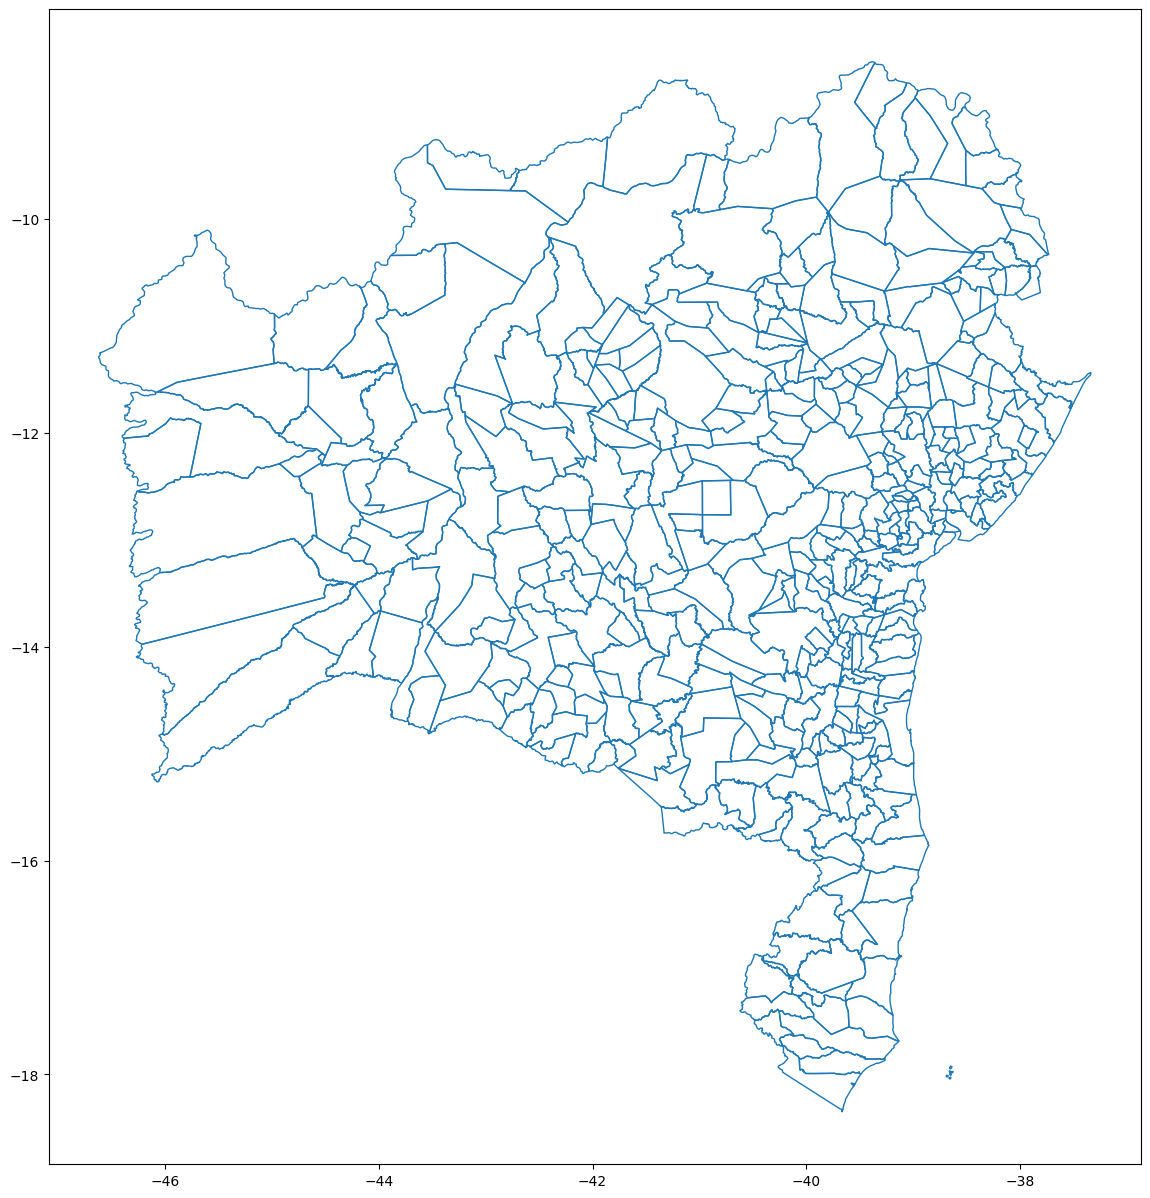

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import json

anos = [
    "2010",
    "2011",
    "2012",
    "2013",
    "2014",
    "2015",
    "2016",
    "2017",
    "2018",
    "2019",
    "2020",
]
indicadores = [
    "Indicador_1_número",
    "Indicador_1_taxa",
    "indicador_3", # ok
    "Indicador_4",
    "indicador_5", # ok
    "indicador_6", # ok - removidos "*" depois dos anos
    "indicador_8", # ok - removida primeira linha do csv e tratados os anos - corrigir escala
    "indicador_9", # ok - Corrigir escala
    "inidicador_3_-_causa",
    "Indicador_11_razao_excitopa",
    "inidicador_11_numero",
    "Inidicador_11_-_mulheres_25a64",
    "Indicador_10",
    "Indicador_11", # verificar campos
    "Indicador_12",
    "Indicador_13", # ok
    "Indicador_14", # inverter cor
    "Indicador_15", # inverter cor
    "Indicador_16", # inverter cor
    "Indicador_17_",
    "Indicador_18",
    "Indicador_19",
    "indicador_23", # legenda grande
]

ano = anos[3]
indicador = indicadores[18]
invert_color_scale = True

# Função para mapear um valor para uma cor em um gradiente
def color_gradient_picker(valor, min_val=0, max_val=100, invert=invert_color_scale):
    norm = mcolors.Normalize(vmin=min_val, vmax=max_val)
    cmap = plt.cm.get_cmap("RdYlGn")
    
    if invert:
        cmap = cmap.reversed()
    
    rgba_color = cmap(norm(valor))
    hex_color = mcolors.rgb2hex(rgba_color)
    return hex_color


# Função para buscar o valor do indicador com base no ano e no código IBGE
def get_indicator_value(df, codigo_ibge, ano):
    if len(str(codigo_ibge)) > 6:
        codigo_ibge = str(codigo_ibge)[:-1]        
    
        print(f"Ano: {ano}")
        print(f"Colunas: {df.columns}")
        print(f"Coluna {ano} no DataFrame: {ano in df.columns}")
    try:
        # Verificar se o código IBGE está no DataFrame
        if codigo_ibge in df['Cod. IBGE'].values:
            # Verificar se o ano está no DataFrame
            if ano in df.columns:
                valor = df[df['Cod. IBGE'] == codigo_ibge][ano].values[0]
                print(f"Valor encontrado: {valor}")
            else:
                print(f"Ano {ano} não encontrado no DataFrame.")
                valor = 0
        else:
            print(f"Código IBGE {codigo_ibge} não encontrado no DataFrame.")
            valor = 0
    except Exception as e:
        print(f"Erro ao buscar valor para código IBGE {codigo_ibge} e ano {ano}: {e}")
        valor = 0
    
    return valor

# Função para extrair o valor da meta
def extract_meta_value(meta_text):
    print(f"Texto da meta: {meta_text}")
    match = re.search(r'(\d+(\.\d+)?)(?=%|)', meta_text)
    if match:
        return float(match.group(1))
    match = re.search(r'Redução\s*(\d+(\.\d+)?)%', meta_text)
    if match:
        return float(match.group(1))
    match = re.search(r'Meta Estadual:\s*(\d+(\.\d+)?)%', meta_text)
    if match:
        return float(match.group(1))
    match = re.search(r'Meta Estadual:\s*(\d+(\.\d+)?)', meta_text)
    if match:
        return float(match.group(1))
    return 0

# Carregar o arquivo GeoJSON
geojson_path = "../../assets/data/geojs-29-mun.json"
with open(geojson_path, "r", encoding="utf-8") as file:
    geojson_data = json.load(file)

# Carregar os dados do CSV do indicador
indicador_csv_path = f"../../assets/indicadores/{indicador}.csv"
df_indicador = pd.read_csv(indicador_csv_path)

# Carregar os dados do CSV de títulos e subtítulos
titulo_subtitulo_csv_path = "../../assets/data/titulo_subtitulo.csv"
df_titulo_subtitulo = pd.read_csv(titulo_subtitulo_csv_path).fillna("")

# Extrair a meta estadual do indicador 3
titulo = df_titulo_subtitulo[df_titulo_subtitulo["nome_arquivo"] == indicador][
    "titulo"
].values[0]
meta_estadual = df_titulo_subtitulo[
    df_titulo_subtitulo["nome_arquivo"] == indicador
]["subtitulo"].values[0]
fonte = df_titulo_subtitulo[df_titulo_subtitulo["nome_arquivo"] == indicador][
    "fonte"
].values[0]

print(extract_meta_value(meta_estadual))
meta_estadual_valor = float(extract_meta_value(meta_estadual))
print(f"Meta Estadual do Indicador : {meta_estadual_valor}")

# Ajustar o código IBGE da tabela de indicadores para remover o último dígito
df_indicador["Cod. IBGE"] = df_indicador["Cod. IBGE"].astype(str)

# Converter o GeoJSON em um GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(geojson_data["features"])

# Adicionar a coluna de valores dos indicadores ao GeoDataFrame
gdf["valor"] = gdf["id"].apply(lambda x: get_indicator_value(df_indicador, x, ano))

gdf['valor'] = pd.to_numeric(gdf['valor'], errors='coerce').fillna(0)

# Criar o mapa estático
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf.boundary.plot(ax=ax, linewidth=1)

# Obter os valores mínimos e máximos para a legenda
min_val, max_val = get_max_min_values(df_indicador, ano)
min_val = float(min_val)
max_val = float(max_val)

print(f"Valor mínimo: {min_val}")
print(f"Valor máximo: {max_val}")
gdf["color"] = gdf["valor"].apply(lambda x: print(x))

# Colorir os municípios com base nos valores dos indicadores
if invert_color_scale:
    gdf["color"] = gdf["valor"].apply(
        lambda x: color_gradient_picker(x, min_val, max_val, invert=True)
    )
else:
    gdf["color"] = gdf["valor"].apply(
        lambda x: color_gradient_picker(x, min_val, max_val)
    )
gdf.plot(ax=ax, color=gdf["color"])

# Adicionar a legenda
sm = plt.cm.ScalarMappable(
    cmap="RdYlGn", norm=plt.Normalize(vmin=min_val, vmax=max_val)
)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Valor do Indicador")

# Adicionar a meta na barra de cores
print(f"Meta Estadual: {meta_estadual_valor} - min: {min_val} - max: {max_val}")

cbar.ax.axhline(meta_estadual_valor, color="blue", linewidth=4)
# cbar.ax.text(
#     1.1,
#     meta_estadual_valor,
#     f"Meta Estadual: {meta_estadual_valor}%",
#     va="center",
#     ha="left",
#     color="blue",
# )


# Adicionar o título e a meta
plt.title(f"Mapa de Indicadores de Saúde - Bahia \n {titulo} \n Ano: {ano}")
plt.text(
    0.5,
    -0.1,
    f"Meta Estadual: {meta_estadual_valor}%",
    ha="center",
    va="center",
    transform=ax.transAxes,
)
plt.text(
    0.5,
    -0.15,
    f"Fonte: {fonte}",
    ha="center",
    va="center",
    transform=ax.transAxes,
)

# Salvar o mapa como uma imagem
plt.savefig(f"../../assets/images/mapa_bahia_{indicador}_{ano}.png", dpi=300, bbox_inches="tight")
plt.show()

In [101]:
import folium
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from branca.colormap import LinearColormap
import re
import geopandas as gpd

# Função para mapear um valor para uma cor em um gradiente
def color_gradient_picker(valor, min_val=0, max_val=100):
    norm = mcolors.Normalize(vmin=min_val, vmax=max_val)
    cmap = plt.cm.get_cmap('RdYlGn')  # Paleta de cores (pode ser alterada)
    rgba_color = cmap(norm(valor))
    hex_color = mcolors.rgb2hex(rgba_color)
    return hex_color

def get_max_min_values(df, year):
    min_val = df[year].min()
    max_val = df[year].max()
    return min_val, max_val

# Função para buscar o valor do indicador com base no ano e no código IBGE
def get_indicator_value(df, codigo_ibge, ano):
    """
    Busca o valor do indicador no DataFrame com base no ano e no código IBGE.
    
    Args:
        df (pd.DataFrame): DataFrame contendo os dados dos indicadores.
        codigo_ibge (str): Código IBGE do município.
        ano (str): Ano para o qual o valor do indicador é necessário.
    
    Returns:
        float: Valor do indicador para o município e ano especificados, ou 0 se não encontrado.
    """
    # Remover o último dígito do código IBGE
    codigo_ibge = str(codigo_ibge)[:-1]
    
    try:
        # Verificar se o código IBGE está no DataFrame
        if codigo_ibge in df['Cod. IBGE'].values:
            # Verificar se o ano está no DataFrame
            if ano in df.columns:
                valor = df[df['Cod. IBGE'] == codigo_ibge][ano].values[0]
            else:
                print(f"Ano {ano} não encontrado no DataFrame.")
                valor = 0
        else:
            print(f"Código IBGE {codigo_ibge} não encontrado no DataFrame.")
            valor = 0
    except Exception as e:
        print(f"Erro ao buscar valor para código IBGE {codigo_ibge} e ano {ano}: {e}")
        valor = 0
    
    return valor

# Função para extrair o valor da meta
def extract_meta_value(meta_text):
    match = re.search(r'(\d+(\.\d+)?)(?=%|)', meta_text)
    if match:
        return float(match.group(1))
    match = re.search(r'Redução\s*(\d+(\.\d+)?)%', meta_text)
    if match:
        return float(match.group(1))
    match = re.search(r'Meta Estadual:\s*(\d+(\.\d+)?)%', meta_text)
    if match:
        return float(match.group(1))
    match = re.search(r'Meta Estadual:\s*(\d+(\.\d+)?)', meta_text)
    if match:
        return float(match.group(1))
    return None

# Carregar o arquivo GeoJSON
geojson_path = './assets/data/geojs-29-mun.json'
with open(geojson_path, 'r', encoding='utf-8') as file:
    geojson_data = json.load(file)

# Carregar os dados do CSV do indicador
indicador_csv_path = './assets/indicadores/indicador_3.csv'
df_indicador = pd.read_csv(indicador_csv_path)

# Carregar os dados do CSV de títulos e subtítulos
titulo_subtitulo_csv_path = './assets/data/titulo_subtitulo.csv'
df_titulo_subtitulo = pd.read_csv(titulo_subtitulo_csv_path)

# Extrair a meta estadual do indicador 3
meta_estadual = df_titulo_subtitulo[df_titulo_subtitulo['nome_arquivo'] == 'indicador_3']['subtitulo'].values[0]
meta_estadual_valor = extract_meta_value(meta_estadual)
print(f'Meta Estadual do Indicador 3: {meta_estadual_valor}')

# Ajustar o código IBGE da tabela de indicadores para remover o último dígito
df_indicador['Cod. IBGE'] = df_indicador['Cod. IBGE'].astype(str).str[:-1].astype(int)
print(df_indicador.head())

# Converter o GeoJSON em um GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(geojson_data["features"])

# Adicionar a coluna de valores dos indicadores ao GeoDataFrame
gdf['valor'] = gdf['id'].apply(lambda x: get_indicator_value(df_indicador, x, '2020'))

# Garantir que todos os valores na coluna 'valor' sejam numéricos
gdf['valor'] = pd.to_numeric(gdf['valor'], errors='coerce').fillna(0)

# Obter os valores mínimos e máximos para a legenda
min_val, max_val = get_max_min_values(df_indicador, '2020')

# Colorir os municípios com base nos valores dos indicadores
gdf["color"] = gdf["valor"].apply(lambda x: color_gradient_picker(x, min_val, max_val))

# Criar o mapa estático
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf.boundary.plot(ax=ax, linewidth=1)
gdf.plot(ax=ax, color=gdf['color'])

# Adicionar a legenda
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=min_val, vmax=max_val))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Valor do Indicador')

# Adicionar a meta na barra de cores
meta_norm = (meta_estadual_valor - min_val) / (max_val - min_val)
cbar.ax.axhline(meta_norm, color='blue', linewidth=2)
cbar.ax.text(1.1, meta_norm, f'Meta: {meta_estadual_valor}%', color='blue', va='center')

# Adicionar o título e a meta
plt.title('Mapa de Indicadores de Saúde - Bahia')
plt.text(0.5, -0.1, f'Meta Estadual: {meta_estadual_valor}%', ha='center', va='center', transform=ax.transAxes)

# Salvar o mapa como uma imagem
plt.savefig('./assets/images/mapa_bahia.png', dpi=300, bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './assets/data/geojs-29-mun.json'

In [ ]:
df_indicador_3 = pd.read_csv('./assets/indicadores/indicador_3.csv')
df_indicador_3

In [56]:
import pandas as pd

def get_indicator_value(df, codigo_ibge, ano):
    """
    Busca o valor do indicador no DataFrame com base no ano e no código IBGE.
    
    Args:
        df (pd.DataFrame): DataFrame contendo os dados dos indicadores.
        codigo_ibge (str): Código IBGE do município.
        ano (str): Ano para o qual o valor do indicador é necessário.
    
    Returns:
        float: Valor do indicador para o município e ano especificados.
    """
    codigo_ibge = str(codigo_ibge)[:-1]
    
    try:
        # Verificar se o código IBGE está no DataFrame
        if codigo_ibge in df['Cod. IBGE'].values:
            # Verificar se o ano está no DataFrame
            if ano in df.columns:
                valor = df[df['Cod. IBGE'] == codigo_ibge][ano].values[0]
            else:
                print(f"Ano {ano} não encontrado no DataFrame.")
                valor = 0
        else:
            print(f"Código IBGE {codigo_ibge} não encontrado no DataFrame.")
            valor = 0
    except Exception as e:
        print(f"Erro ao buscar valor para código IBGE {codigo_ibge} e ano {ano}: {e}")
        valor = 0
    
    print(f'Valor do indicador para o código IBGE {codigo_ibge} no ano {ano}: {valor}')
    return valor

# Exemplo de uso
indicador_csv_path = '../../assets/indicadores/indicador_3.csv'
df_indicador = pd.read_csv(indicador_csv_path)

# Ajustar o código IBGE da tabela de indicadores para remover o último dígito
df_indicador['Cod. IBGE'] = df_indicador['Cod. IBGE'].astype(str)
print(df_indicador.head())
print(df_indicador['Cod. IBGE'].values)

# Testar a função com um exemplo
print(get_indicator_value(df_indicador, 2927408, '2020'))


  Macrorregião de Saúde   Região de Saúde Cod. IBGE         Município  \
0          Centro Leste  Feira de Santana    290110  Amélia Rodrigues   
1          Centro Leste  Feira de Santana    290150           Anguera   
2          Centro Leste  Feira de Santana    290170   Antônio Cardoso   
3          Centro Leste  Feira de Santana    290260      Baixa Grande   
4          Centro Leste  Feira de Santana    290640           Candeal   

        2010       2011       2012       2013       2014       2015  \
0  95.731707  95.266272  98.013245  88.194444  90.789474  87.134503   
1  90.909091  96.610169  80.701754  92.537313  89.855072  89.830508   
2  81.818182  77.464789  78.571429  79.710145  82.758621  84.507042   
3  78.095238  59.595960  71.666667  75.833333  63.414634  78.787879   
4  73.437500  62.000000  64.444444  66.129032  66.000000  51.851852   

        2016       2017       2018       2019       2020  
0  83.620690  93.788820  86.813187  81.595092  84.293194  
1  78.947368  82